
---- Bench Press ----
Root Mean Squared Error (RMSE): 6.91


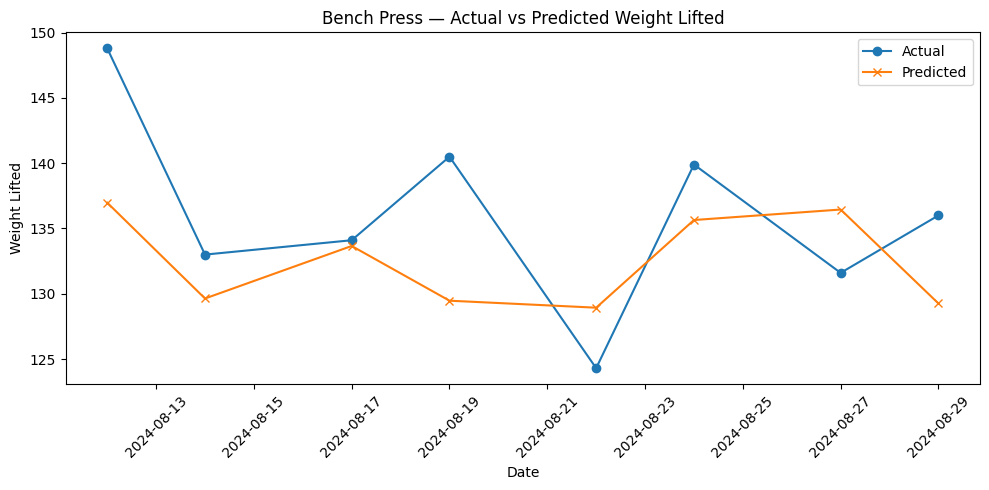


---- Squat ----
Root Mean Squared Error (RMSE): 2.68


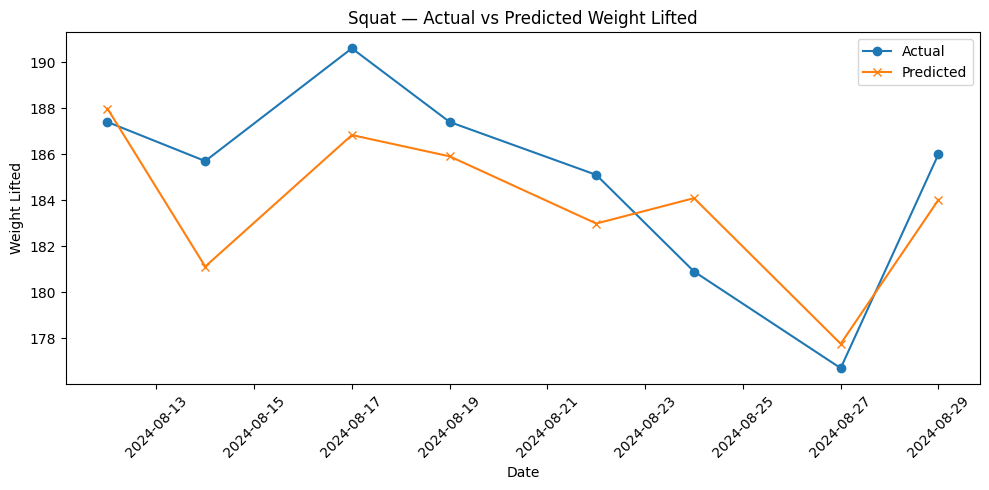


---- Deadlift ----
Root Mean Squared Error (RMSE): 2.34


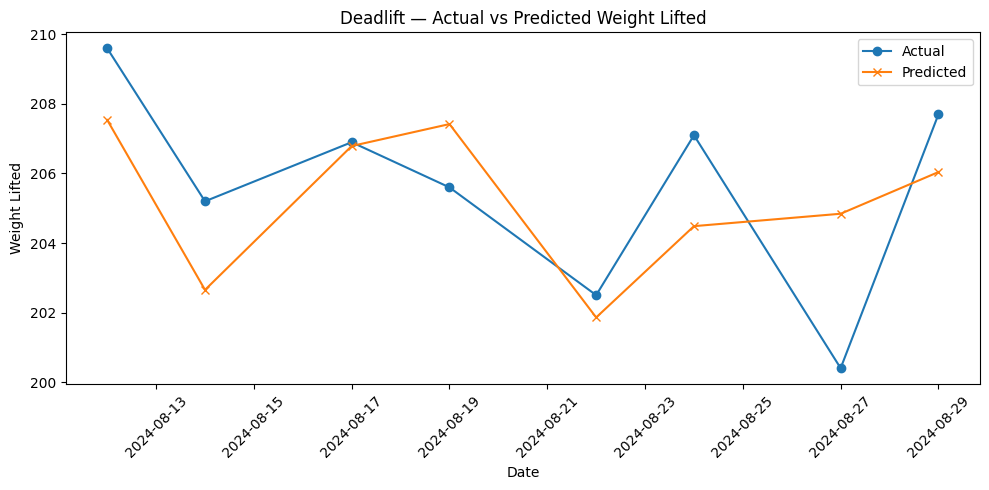

In [10]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Load cleaned data
df = pd.read_csv("/Users/satvikhulikere/workout-forecasting-ml/data/workout_data.csv")

# Convert Date column to datetime
df["Date"] = pd.to_datetime(df["Date"])

# Sort the data by date
df = df.sort_values("Date")

# Set target and features
target = "WeightLifted"
features = ["Reps", "Sets", "SleepHours", "Calories", "ProteinIntake", "SorenessLevel", "Bodyweight"]

# Loop through each unique exercise
for exercise in df["Exercise"].unique():
    print(f"\n---- {exercise} ----")
    
    # Filter data for the specific exercise
    exercise_df = df[df["Exercise"] == exercise].copy()
    
    # Skip if too little data
    if len(exercise_df) < 10:
        print("Not enough data. Skipping.")
        continue

    # Split into train/test
    split_idx = int(len(exercise_df) * 0.8)
    train = exercise_df.iloc[:split_idx]
    test = exercise_df.iloc[split_idx:]

    X_train = train[features]
    y_train = train[target]
    X_test = test[features]
    y_test = test[target]

    # Train model
    model = RandomForestRegressor(random_state=42)
    model.fit(X_train, y_train)

    # Predict
    preds = model.predict(X_test)

    # Evaluate
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

    # Plot
    plt.figure(figsize=(10, 5))
    plt.plot(test["Date"], y_test.values, label="Actual", marker='o')
    plt.plot(test["Date"], preds, label="Predicted", marker='x')
    plt.title(f"{exercise} — Actual vs Predicted Weight Lifted")
    plt.xlabel("Date")
    plt.ylabel("Weight Lifted")
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
